In [ ]:
from momentArms_plot import MomentArmAnalyzer
from optimization_grid import AdjustPersonal
import logging
import sys
import os

# 1. Plot All Muscles

In [2]:
# Models to process
gen_model_path = "../final_results/generic_scaled/scaled_model.osim"
pers_model_path = "../final_results/personalized/tps_skin_wrp_updated.osim"

# Output folder
output_folder = "../final_results/personalized/"

Initialized analysis for 14 coordinates
Loading generic model data...
Loading personalized model data...
Data loading complete.
Available coordinates for plotting: ['ankle_angle_l', 'ankle_angle_r', 'hip_adduction_l', 'hip_adduction_r', 'hip_flexion_l', 'hip_flexion_r', 'hip_rotation_l', 'hip_rotation_r', 'knee_angle_l', 'knee_angle_r']
Plotting 10 coordinates...
Plotting 1/10: ankle_angle_l
Plotting 2/10: ankle_angle_r
Plotting 3/10: hip_adduction_l
Global y-axis range for hip_adduction_l: [-0.0874, 0.0821] meters
Coordinate 'hip_adduction_l' detected as rotational
X-axis range: -50.00 to 30.00 °


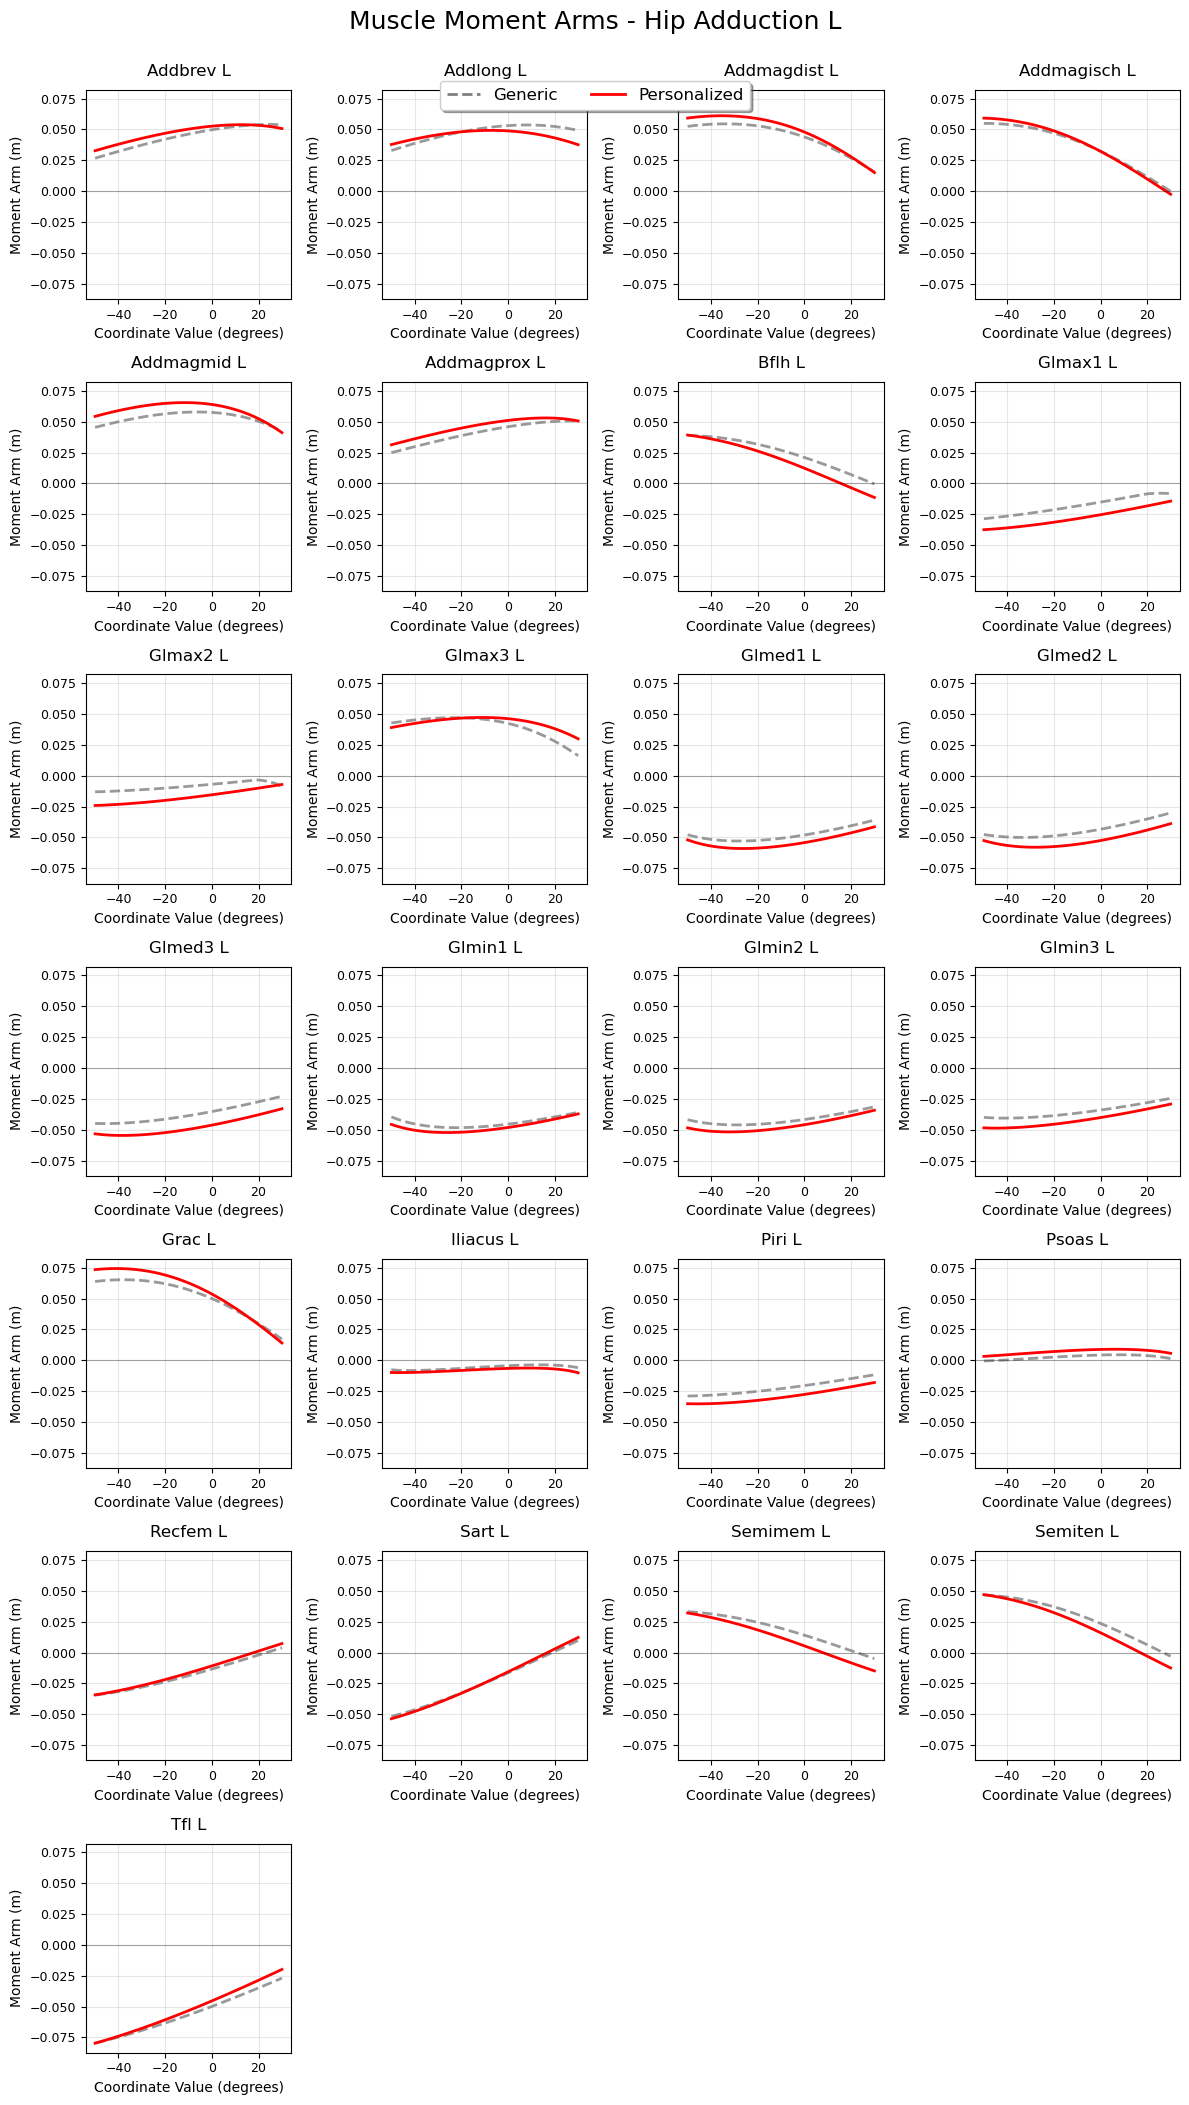

Plotting 4/10: hip_adduction_r
Global y-axis range for hip_adduction_r: [-0.0874, 0.0815] meters
Coordinate 'hip_adduction_r' detected as rotational
X-axis range: -50.00 to 30.00 °


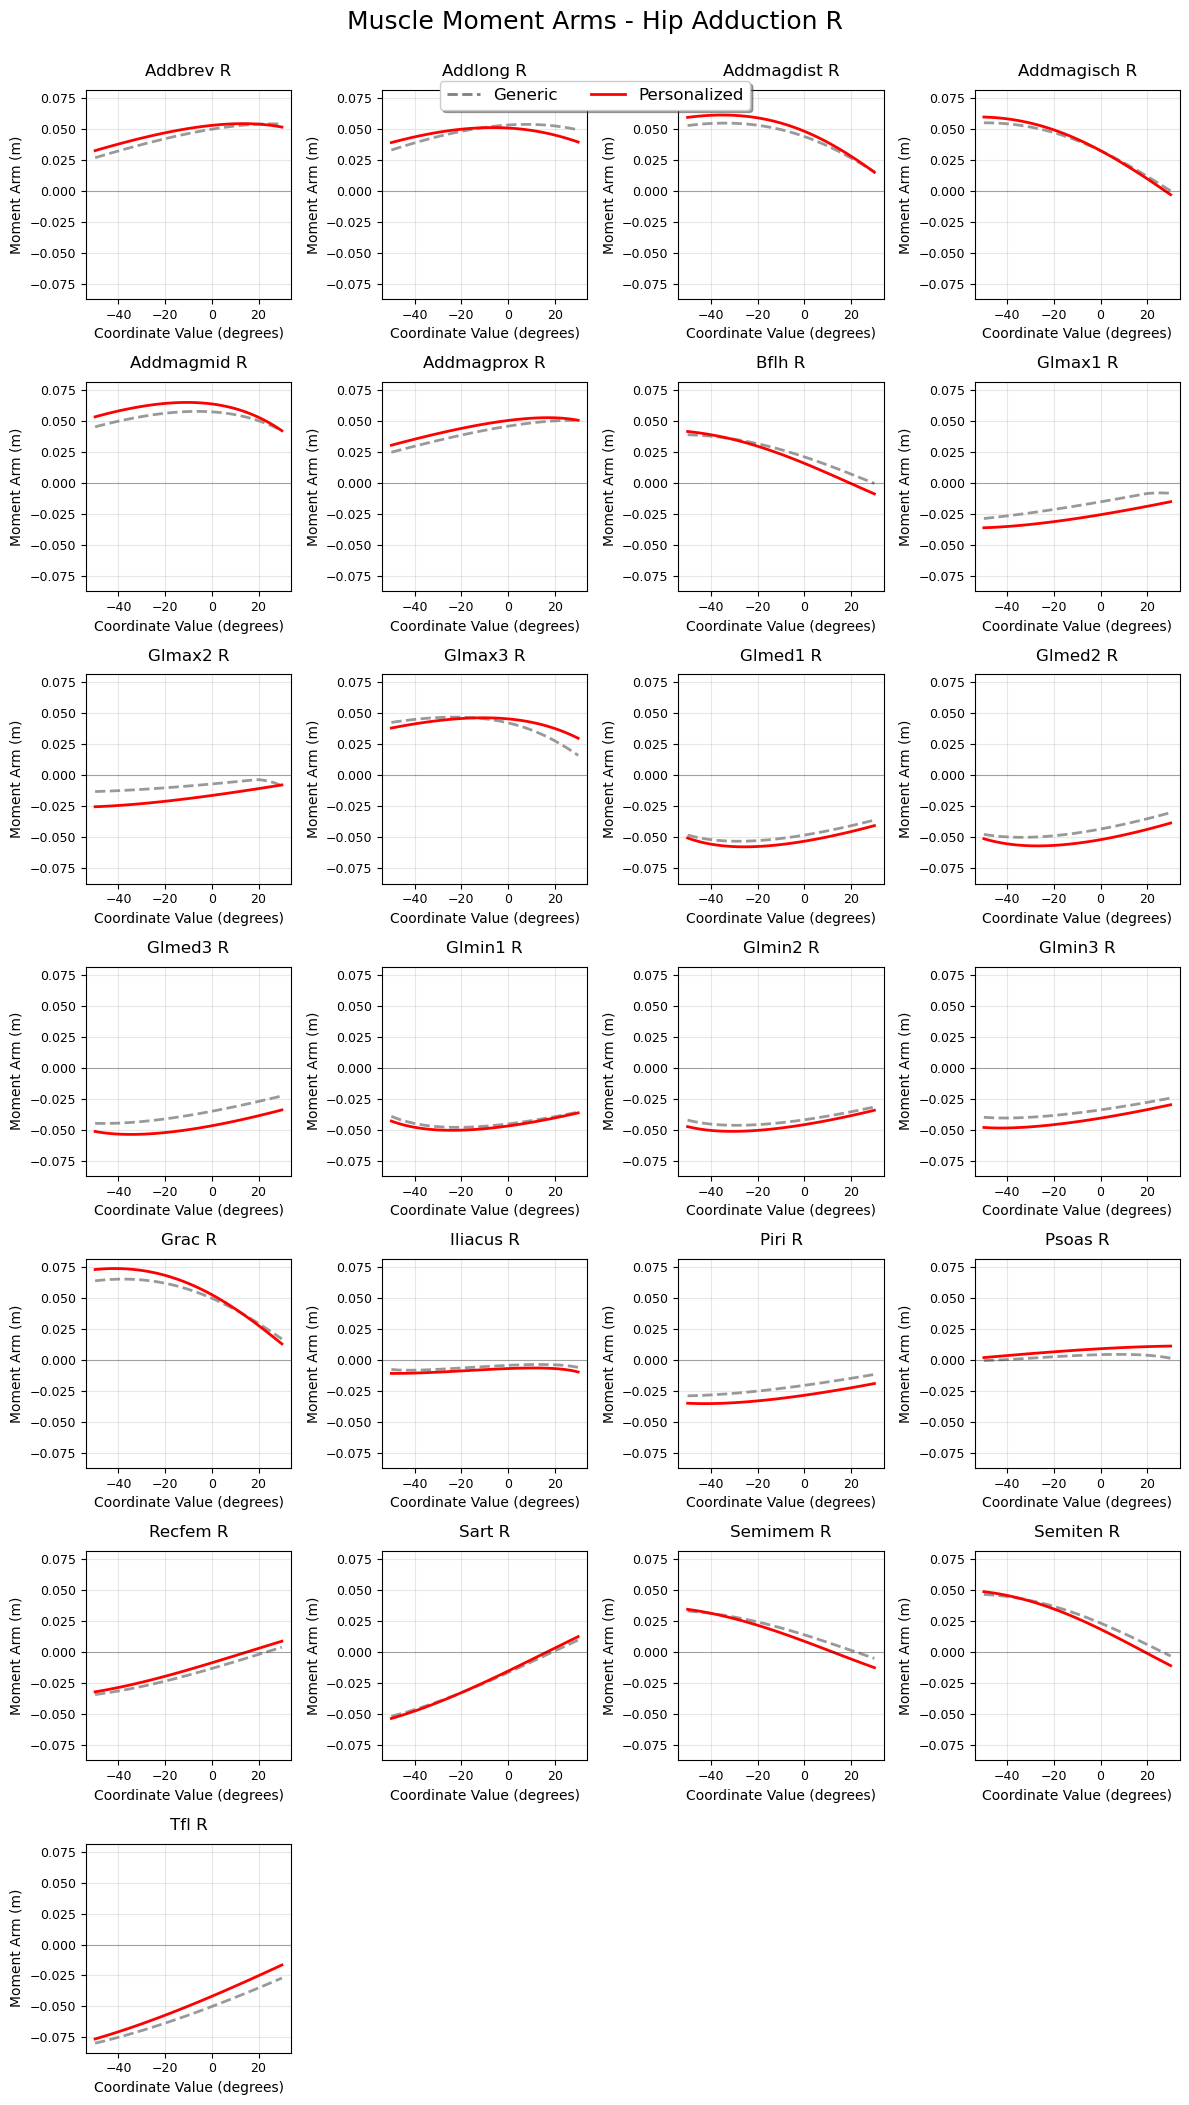

Plotting 5/10: hip_flexion_l
Global y-axis range for hip_flexion_l: [-0.0766, 0.0972] meters
Coordinate 'hip_flexion_l' detected as rotational
X-axis range: -30.00 to 120.00 °


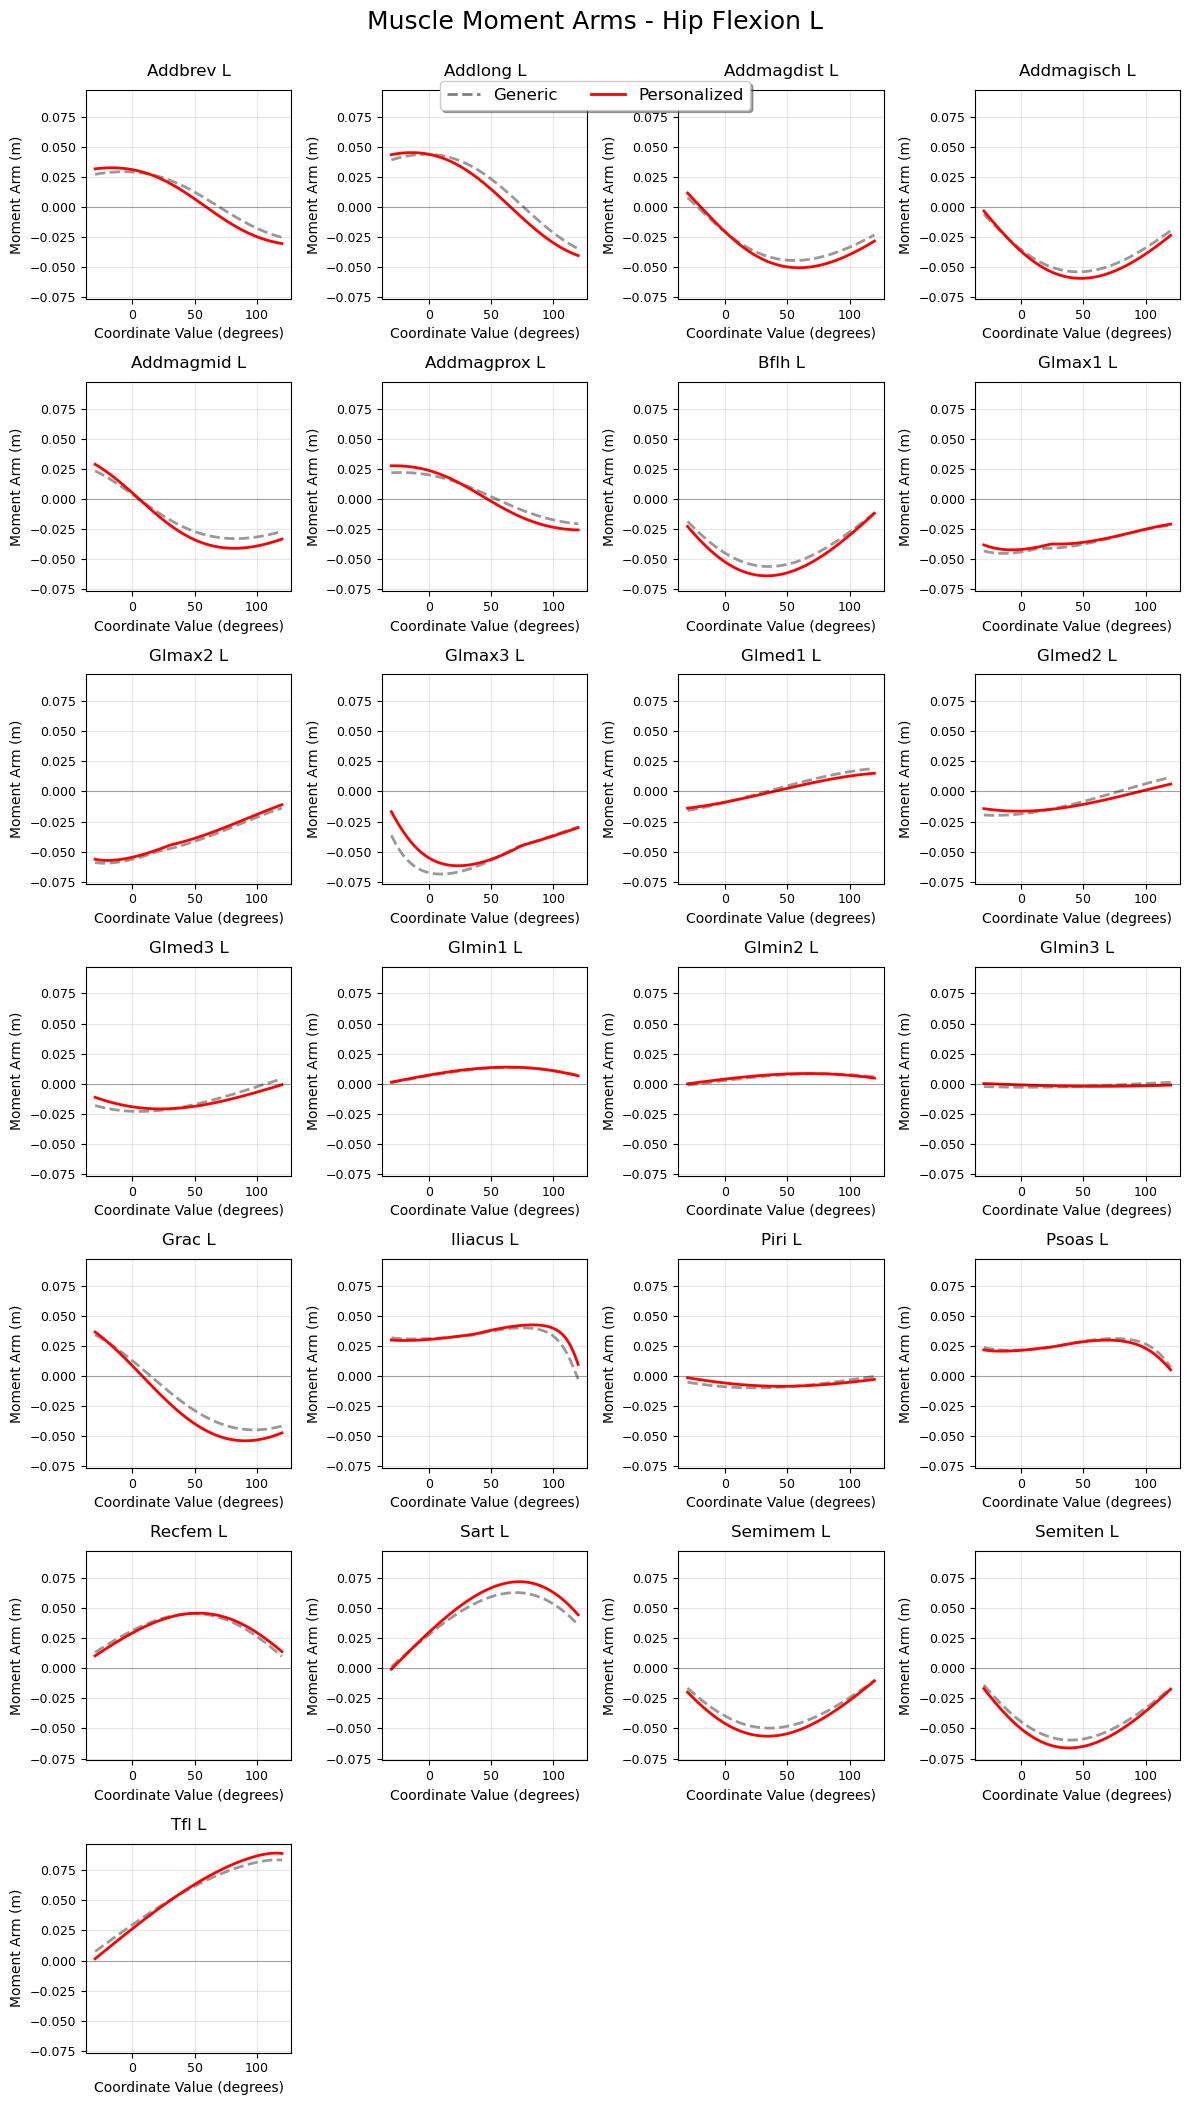

Plotting 6/10: hip_flexion_r
Global y-axis range for hip_flexion_r: [-0.0766, 0.0981] meters
Coordinate 'hip_flexion_r' detected as rotational
X-axis range: -30.00 to 120.00 °


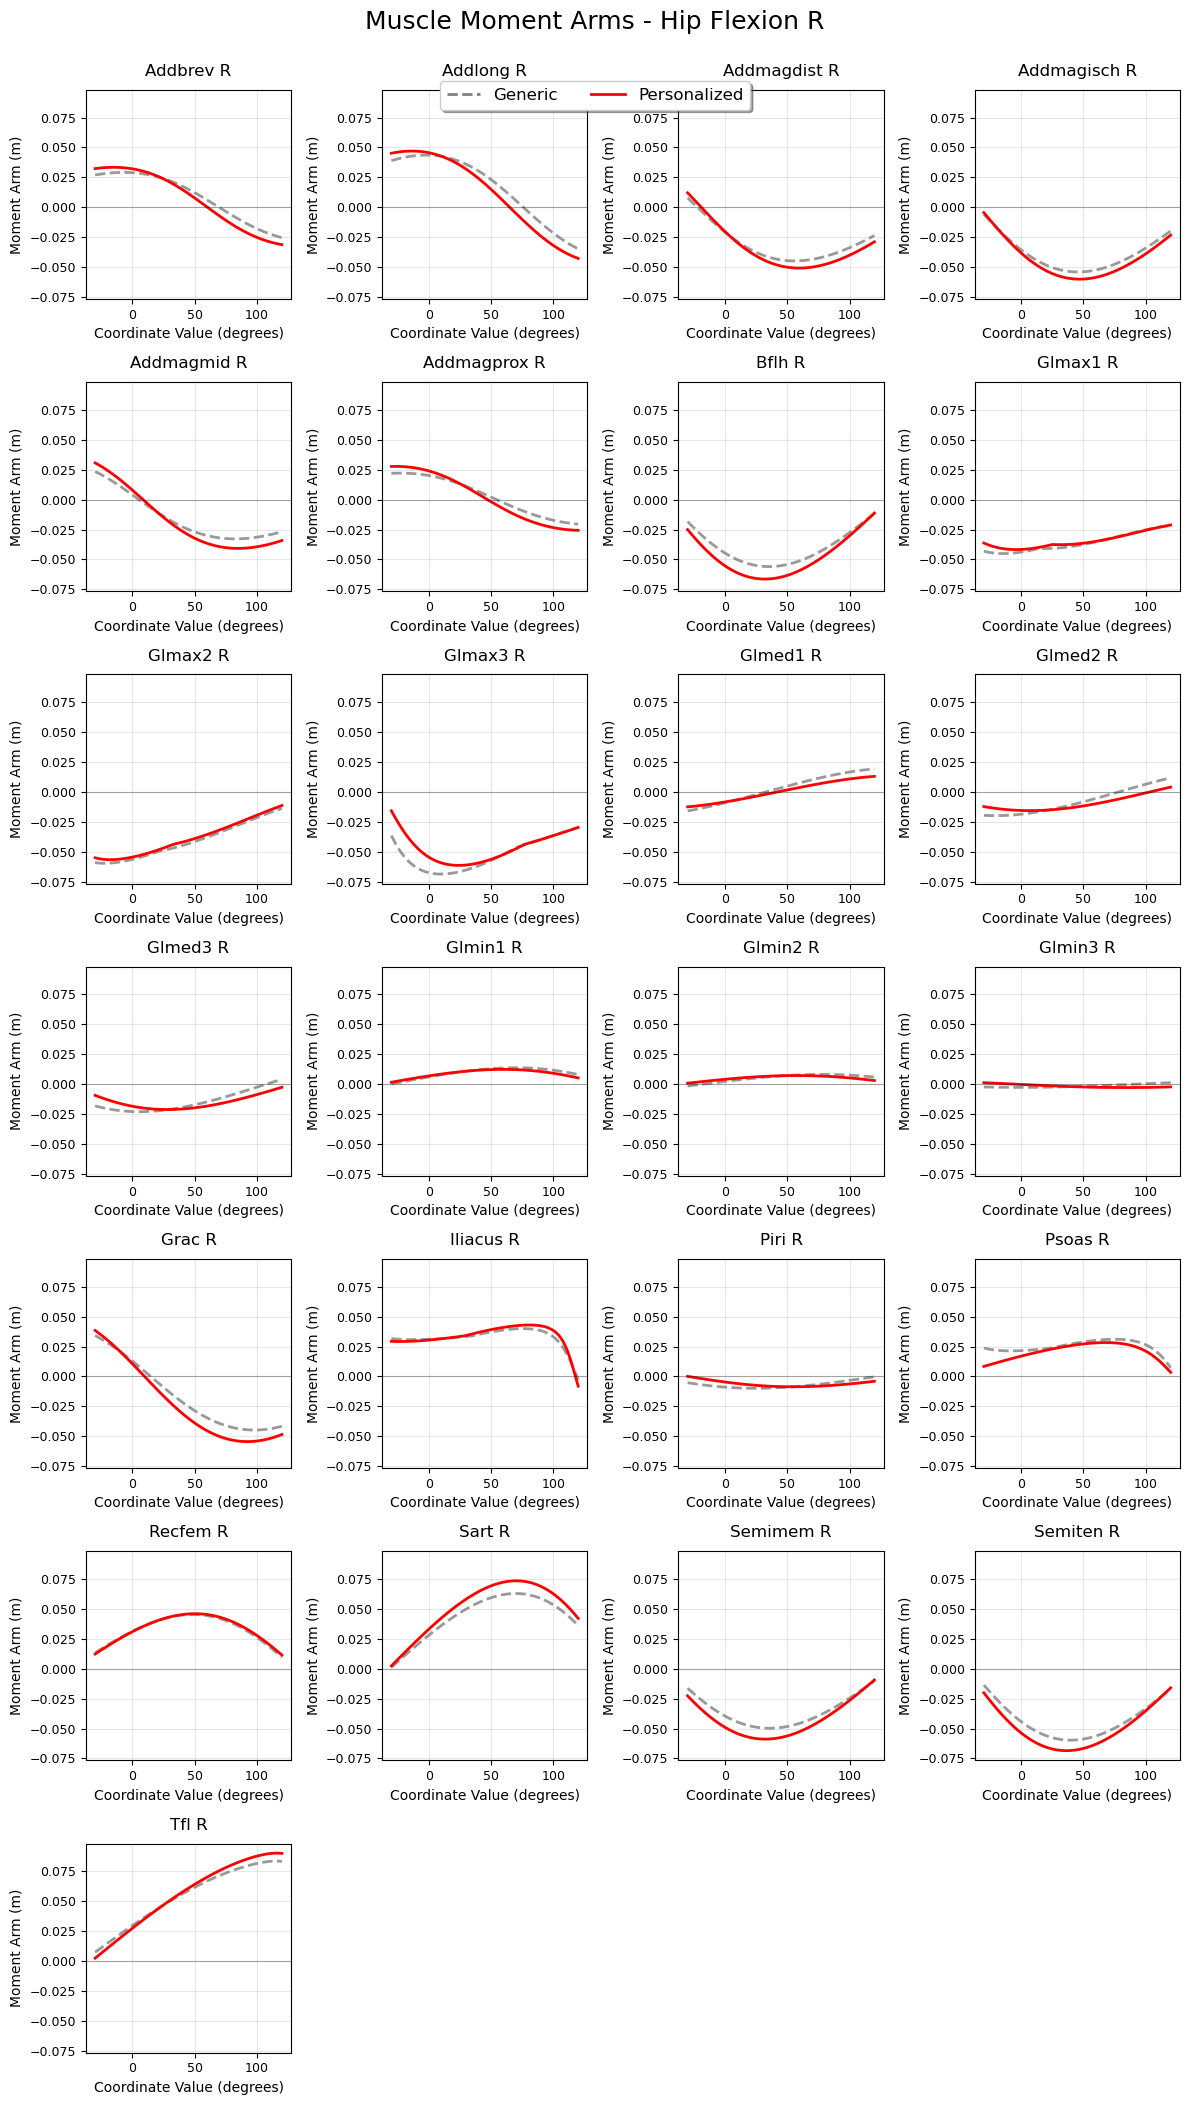

Plotting 7/10: hip_rotation_l
Global y-axis range for hip_rotation_l: [-0.0427, 0.0249] meters
Coordinate 'hip_rotation_l' detected as rotational
X-axis range: -40.00 to 40.00 °


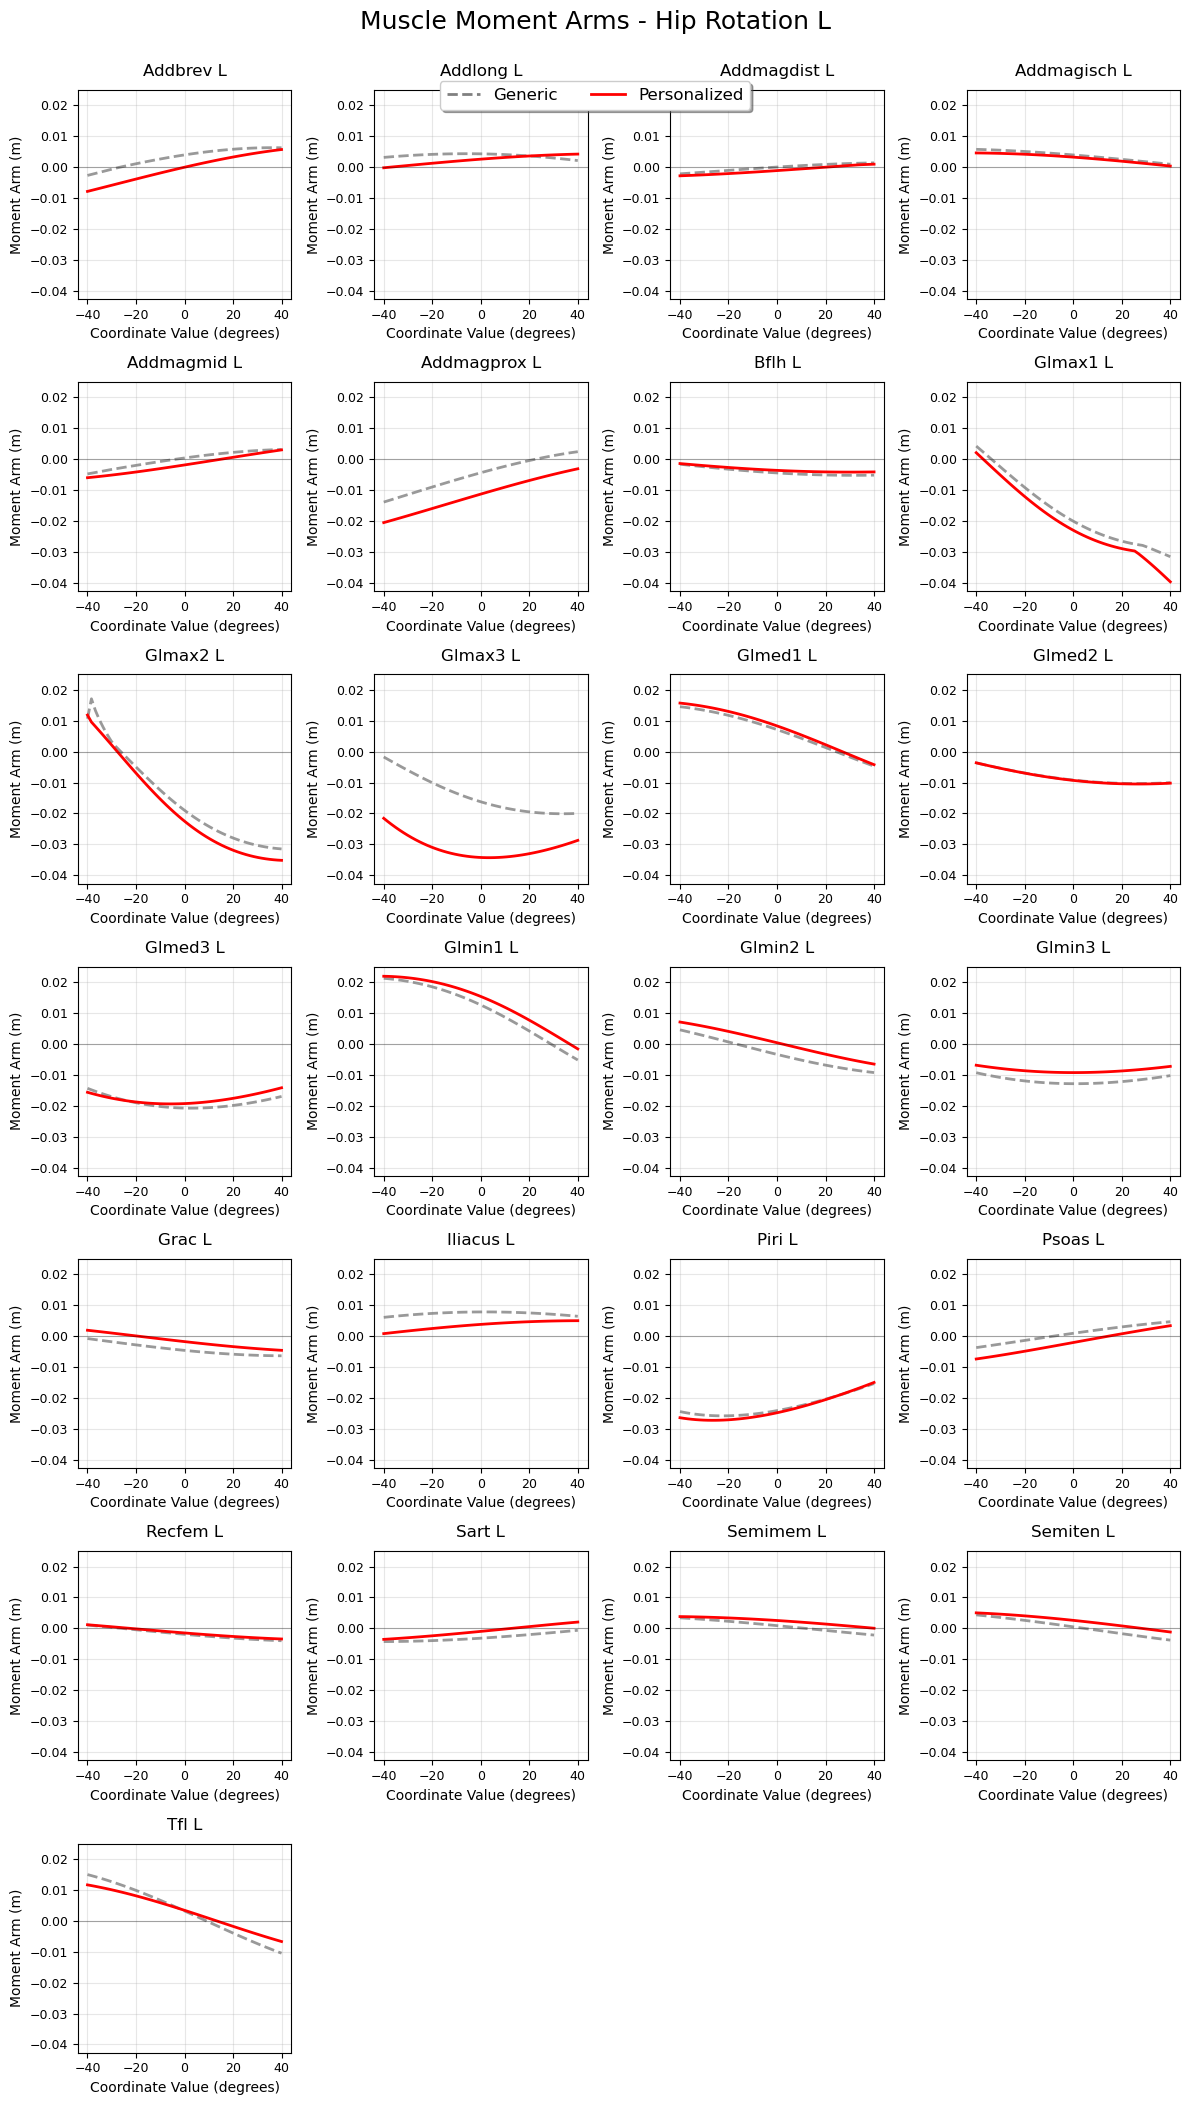

Plotting 8/10: hip_rotation_r
Global y-axis range for hip_rotation_r: [-0.0436, 0.0253] meters
Coordinate 'hip_rotation_r' detected as rotational
X-axis range: -40.00 to 40.00 °


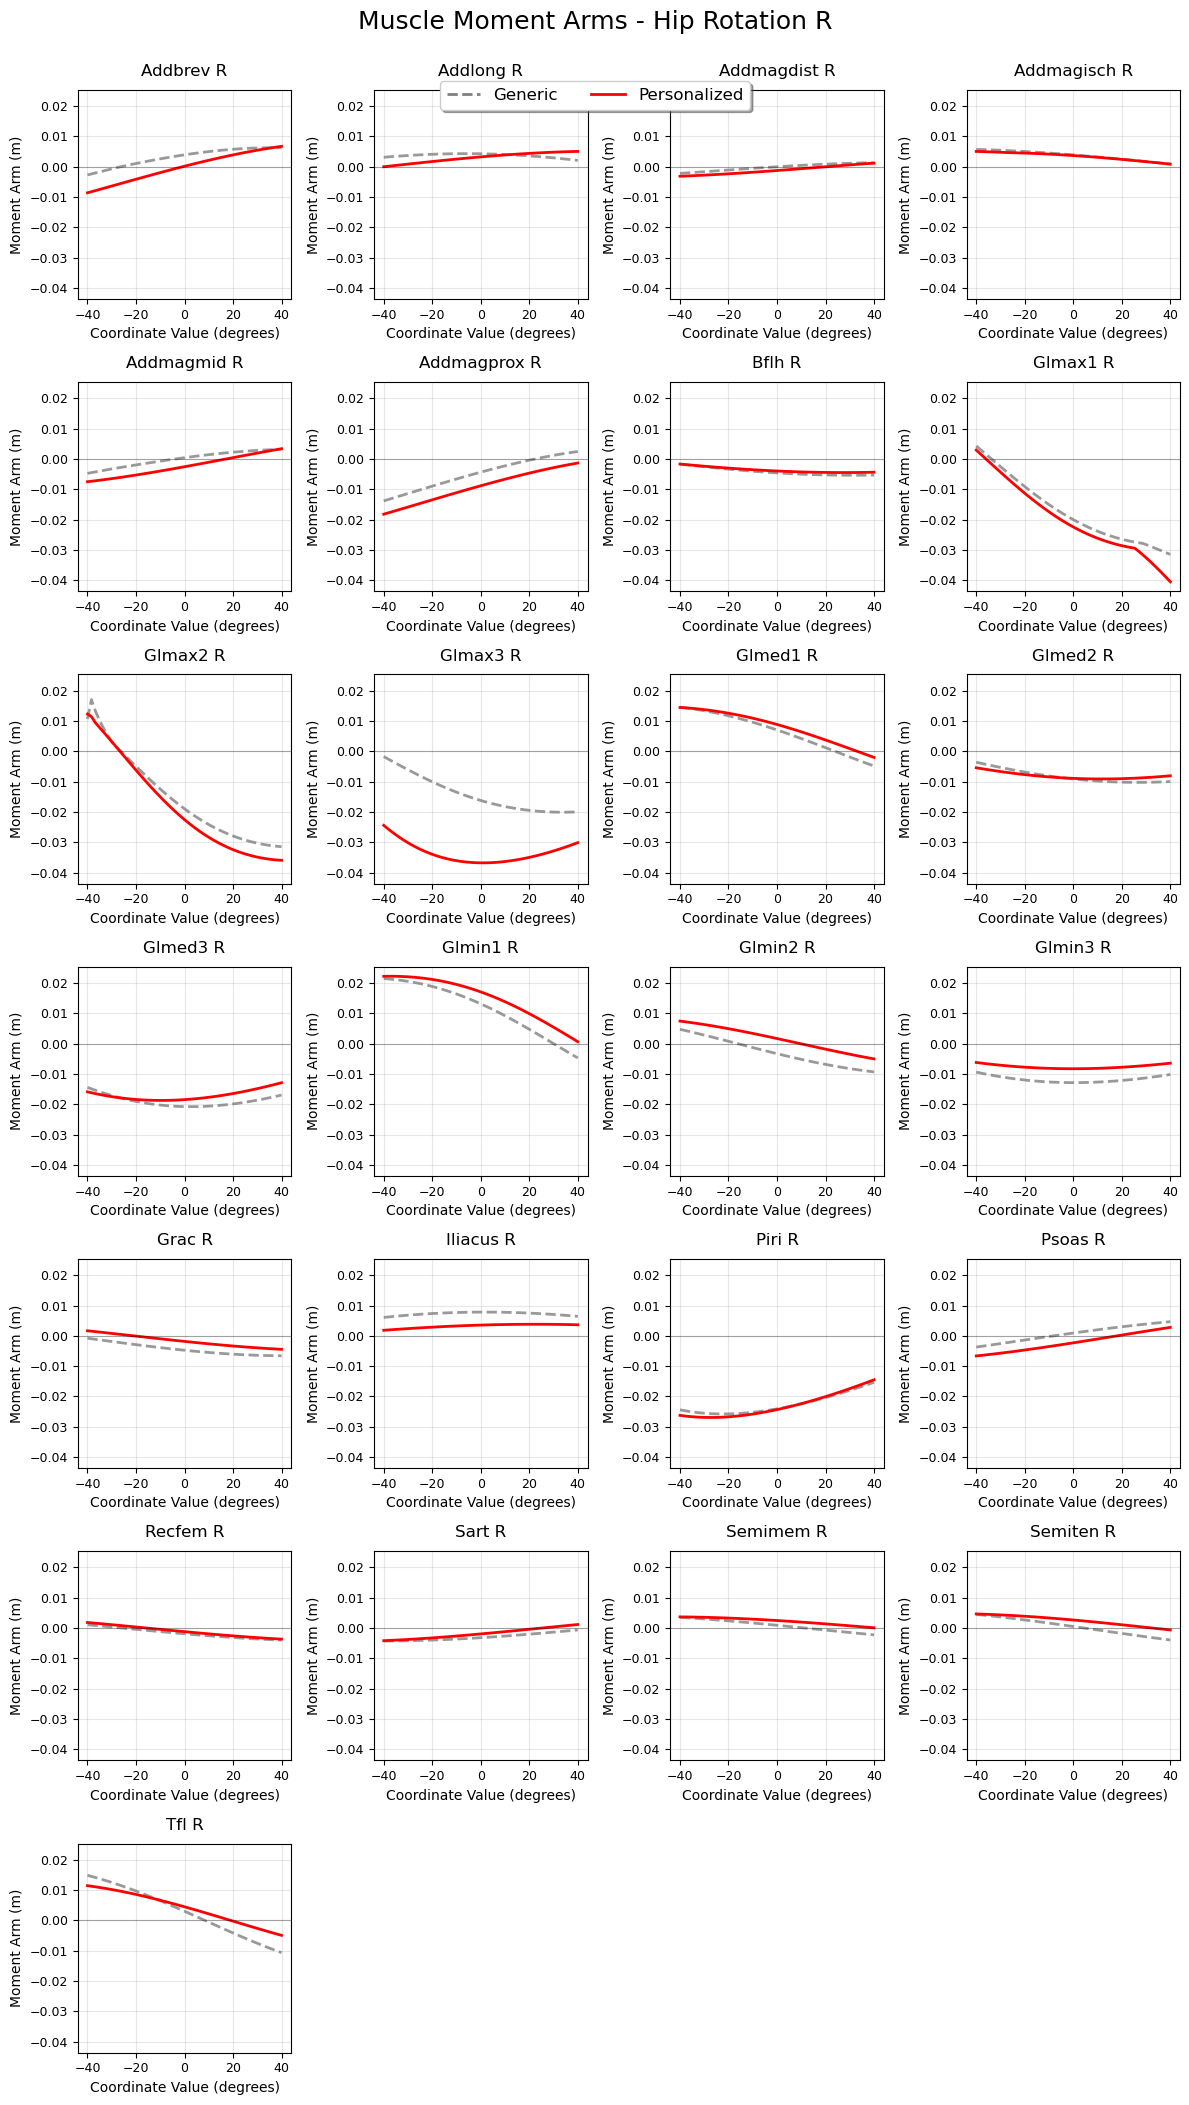

Plotting 9/10: knee_angle_l
Global y-axis range for knee_angle_l: [-0.0482, 0.0582] meters
Coordinate 'knee_angle_l' detected as rotational
X-axis range: 0.00 to 120.00 °


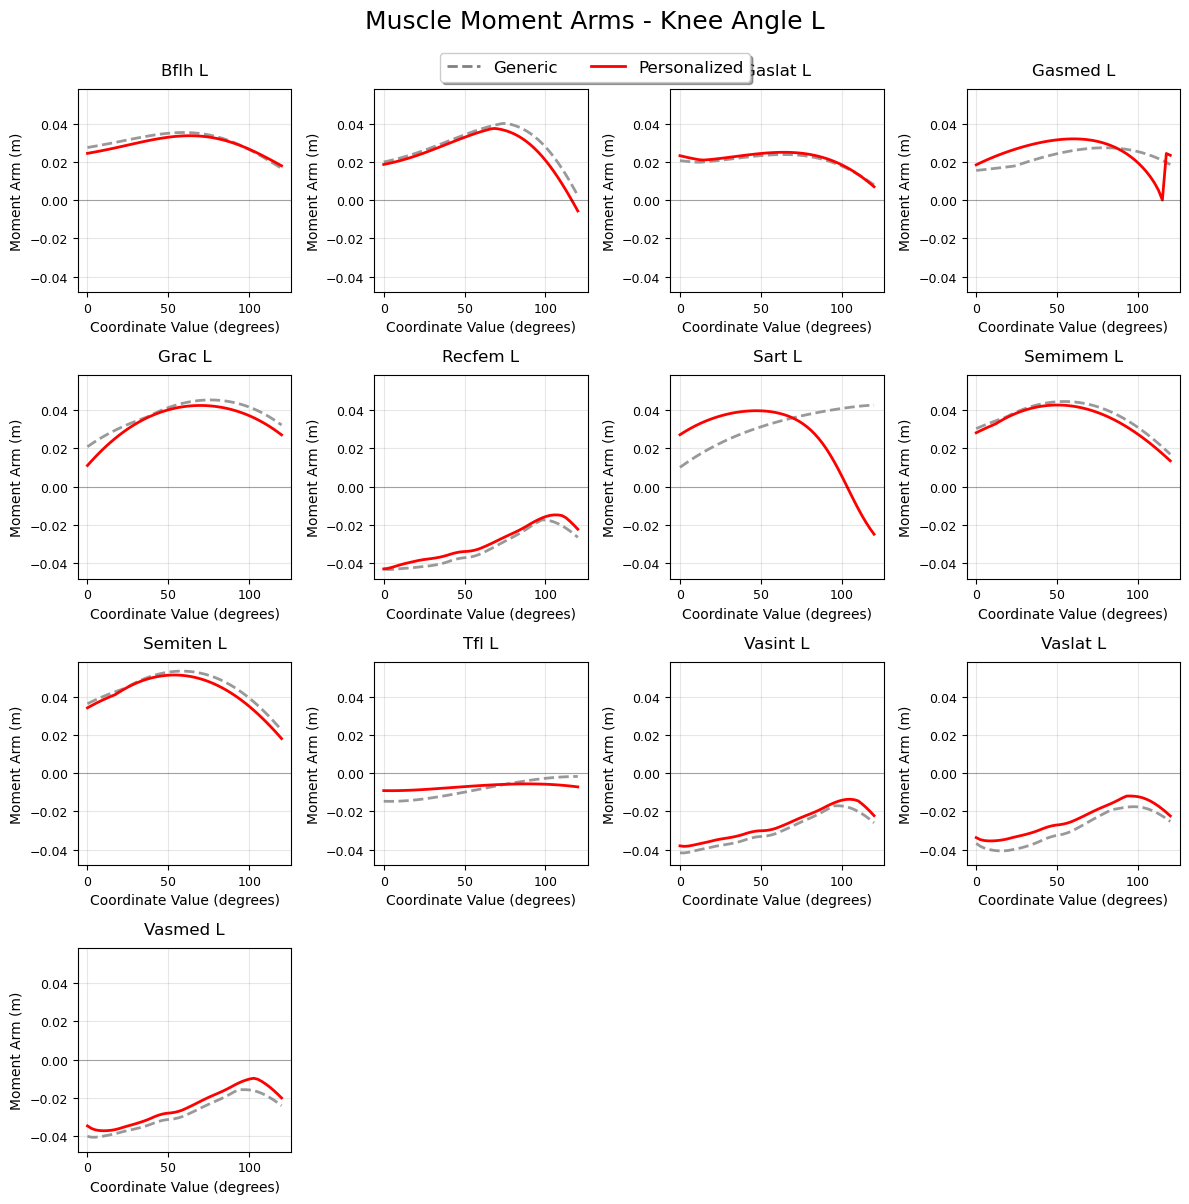

Plotting 10/10: knee_angle_r
Global y-axis range for knee_angle_r: [-0.0489, 0.0608] meters
Coordinate 'knee_angle_r' detected as rotational
X-axis range: 0.00 to 120.00 °


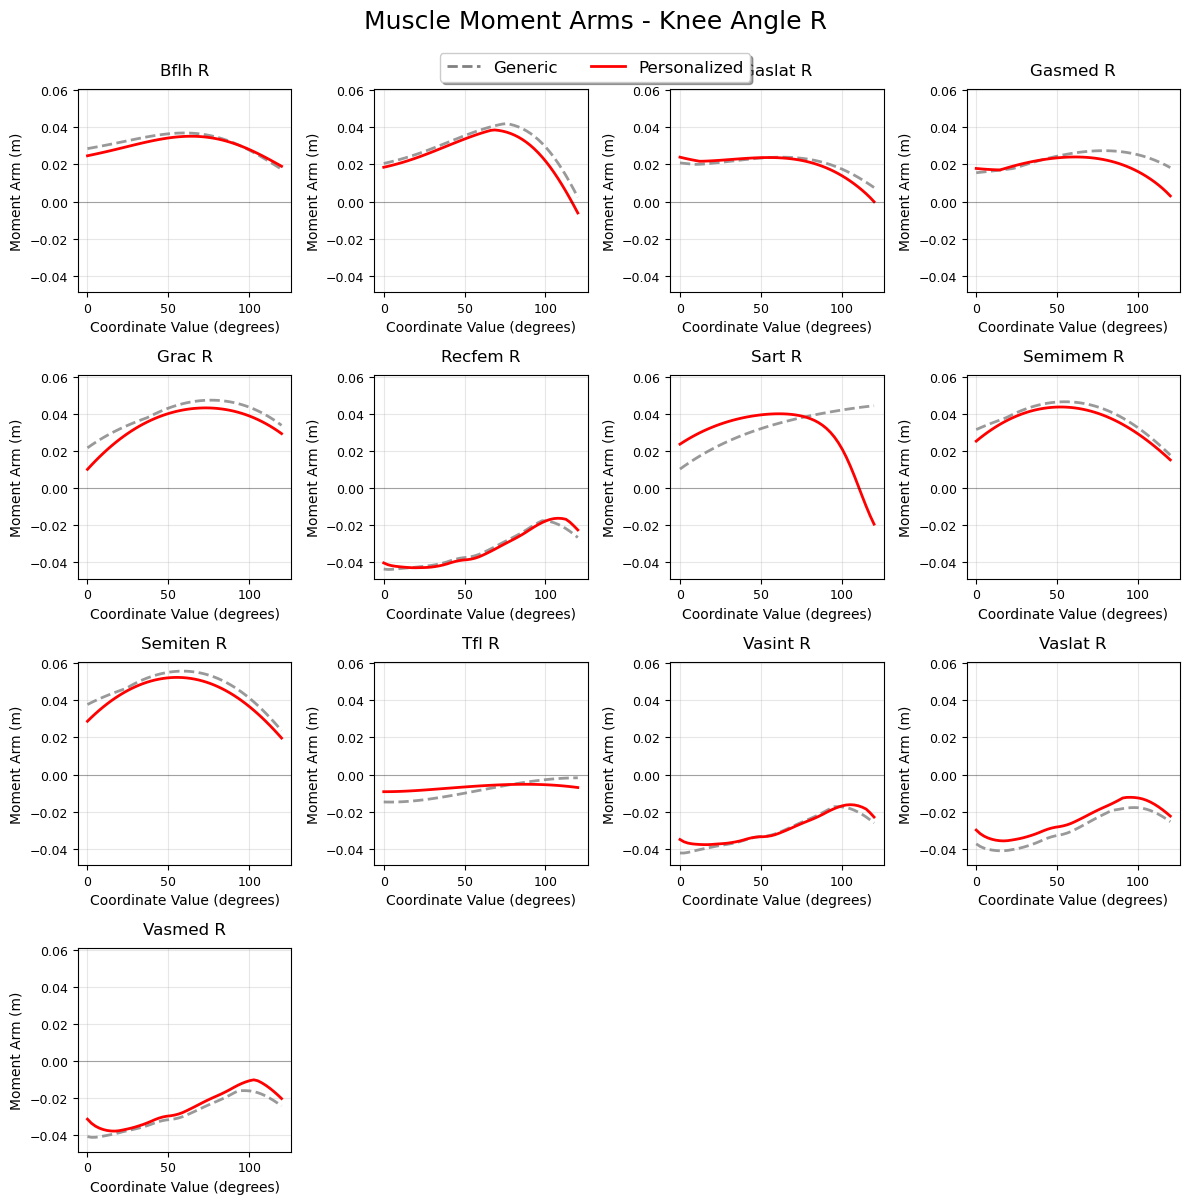

In [3]:
analyzer = MomentArmAnalyzer(gen_model_path, pers_model_path, output_folder)
analyzer.analyze_all_coordinates()

# 2. Optimize Selected Muscles and Plot Results

In [4]:
# List of muscles to process
mscls = ['gasmed_r', 'gasmed_l', 'tfl_r', 'tfl_l', 'sart_r', 'sart_l']

# Models to process
gen_model_path = "../final_results/generic_scaled/scaled_model.osim"
pers_model_path = "../final_results/personalized/tps_skin_wrp_updated.osim"

# Output
output_folder = "../final_results/personalized/"
output_model_path = "../final_results/personalized/tps_optimised.osim"

# Create logs directory if it doesn't exist
os.makedirs('logs_optimisation', exist_ok=True)
# Clear any existing handlers to avoid duplicate logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
    log_file = f"logs_optimisation/log.log"
# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler(log_file, mode='w'),  # 'w' mode overwrites existing log
        logging.StreamHandler(sys.stdout)
    ])
# Get the main logger
logger = logging.getLogger()
logger.info(f"Starting optimization)")
logger.info(f"Generic model: {gen_model_path}")
logger.info(f"Personalized model: {pers_model_path}")
    
try:
    # Create AdjustPersonal instance
    adjust_operator = AdjustPersonal(gen_model_path, pers_model_path)
    
    # Process muscles
    logger.info(f"Processing {len(mscls)} muscles")
    adjust_operator.process_muscles(mscls)
    
    # Save the model
    logger.info(f"Saving adjusted model to {output_model_path}")
    adjust_operator.save_model(output_model_path)
    
    logger.info(f"Optimization completed successfully.")
except Exception as e:
    logger.error(f"Error processing: {str(e)}", exc_info=True)

logger.info(f"Completed processing\n")

2025-06-29 14:40:50,301 - INFO - Starting optimization)
2025-06-29 14:40:50,302 - INFO - Generic model: ../final_results/generic_scaled/scaled_model.osim
2025-06-29 14:40:50,304 - INFO - Personalized model: ../final_results/personalized/tps_skin_wrp_updated.osim
2025-06-29 14:40:50,305 - INFO - Loading generic model from ../final_results/generic_scaled/scaled_model.osim
2025-06-29 14:40:50,375 - INFO - Loading personalized model from ../final_results/personalized/tps_skin_wrp_updated.osim
2025-06-29 14:40:50,431 - INFO - AdjustPersonal initialized successfully
2025-06-29 14:40:50,431 - INFO - Processing 6 muscles
2025-06-29 14:40:50,433 - INFO -  ------------ Processing muscle 1/6: gasmed_r ----------------
2025-06-29 14:40:50,450 - INFO - Processing knee joint muscle (right): gasmed_r
2025-06-29 14:40:50,469 - INFO - Processing muscle gasmed_r for coordinate knee_angle_r
2025-06-29 14:40:51,389 - INFO - Initial error: 0.004258, drop: 0
2025-06-29 14:40:51,389 - INFO - Optimizing muscl

c:\Users\User\miniconda3\envs\py311\Lib\site-packages\scipy\optimize\_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.007919261214602517
            Iterations: 4
            Function evaluations: 24
            Gradient evaluations: 4
2025-06-29 14:42:26,458 - INFO - Optimization result: error=0.001051, drop=0, displacement=0.008267m
2025-06-29 14:42:26,458 - INFO - Solution accepted: Significant error improvement (>10%)
2025-06-29 14:42:26,458 - INFO - Solution accepted: Smaller error and zero drop
2025-06-29 14:42:26,478 - INFO - Applied new location: [ 0.01465407 -0.34968557 -0.02144048]. Old location: [ 0.00722706 -0.35327934 -0.02195728]
2025-06-29 14:42:26,518 - INFO -  ------------ Processing muscle 2/6: gasmed_l ----------------
2025-06-29 14:42:26,533 - INFO - Processing knee joint muscle (left): gasmed_l
2025-06-29 14:42:26,549 - INFO - Processing muscle gasmed_l for coordinate knee_angle_l
2025-06-29 14:42:27,493 - INFO - Initial error: 0.006435, drop: 1
2025-06-29 14:42:27,493 - INFO - Optimizing m

Initialized analysis for 14 coordinates
Loading generic model data...
Loading personalized model data...
Data loading complete.
Global y-axis range for hip_flexion_r: [-0.0030, 0.0909] meters
Coordinate 'hip_flexion_r' detected as rotational
X-axis range: -30.00 to 120.00 °


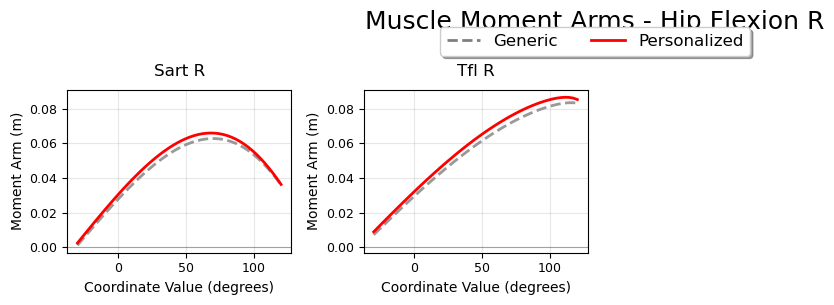

Global y-axis range for hip_adduction_r: [-0.0842, 0.0143] meters
Coordinate 'hip_adduction_r' detected as rotational
X-axis range: -50.00 to 30.00 °


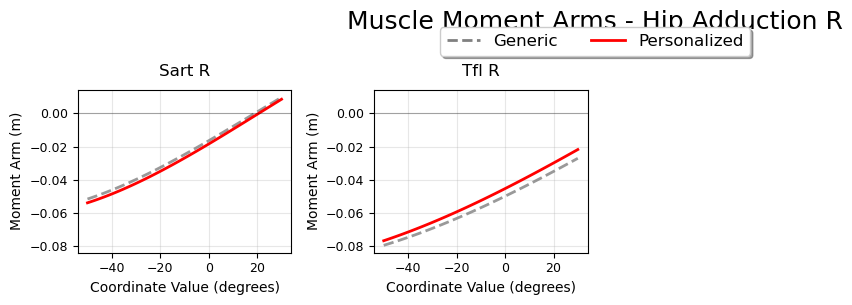

Global y-axis range for hip_rotation_r: [-0.0119, 0.0161] meters
Coordinate 'hip_rotation_r' detected as rotational
X-axis range: -40.00 to 40.00 °


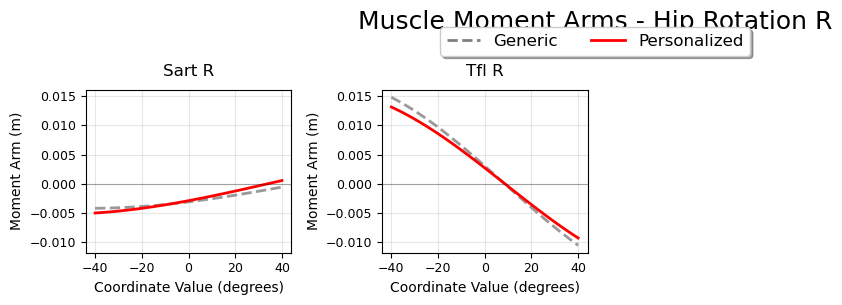

Global y-axis range for knee_angle_r: [-0.0178, 0.0473] meters
Coordinate 'knee_angle_r' detected as rotational
X-axis range: 0.00 to 120.00 °


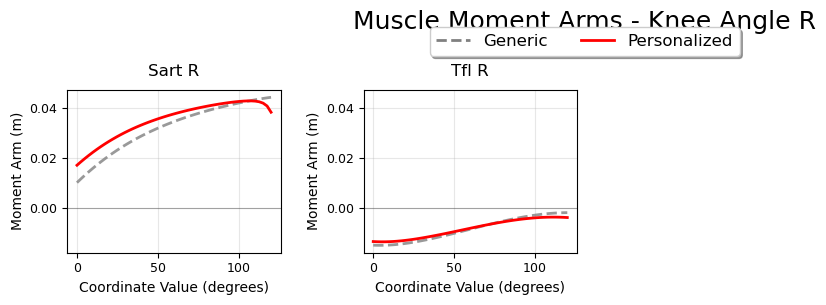

In [5]:
# Create analyzer
analyzer = MomentArmAnalyzer(gen_model_path, output_model_path, output_folder)
specific_muscles_1 = ['tfl_r', 'sart_r']
specific_coordinates_1 = ['hip_flexion_r', 'hip_adduction_r', 'hip_rotation_r', 'knee_angle_r']
analyzer.load_data(num_points=50)
analyzer.plot_specific_muscles(specific_coordinates_1, specific_muscles_1, True, True)


Global y-axis range for hip_flexion_l: [-0.0056, 0.0959] meters
Coordinate 'hip_flexion_l' detected as rotational
X-axis range: -30.00 to 120.00 °


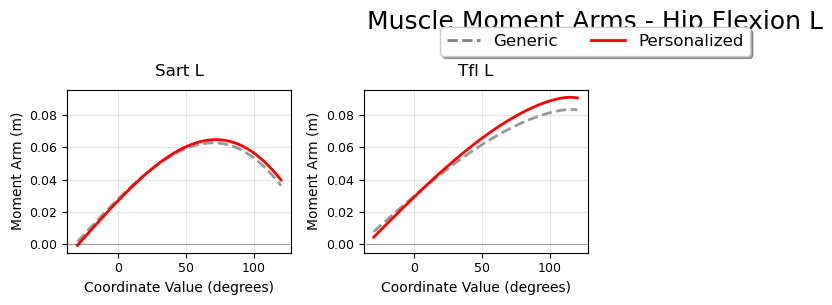

Global y-axis range for hip_adduction_l: [-0.0861, 0.0144] meters
Coordinate 'hip_adduction_l' detected as rotational
X-axis range: -50.00 to 30.00 °


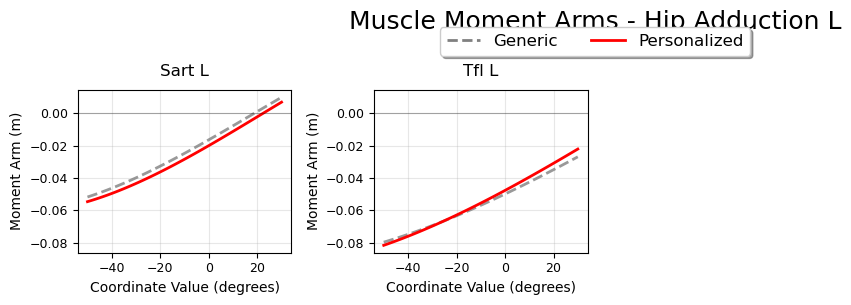

Global y-axis range for hip_rotation_l: [-0.0118, 0.0162] meters
Coordinate 'hip_rotation_l' detected as rotational
X-axis range: -40.00 to 40.00 °


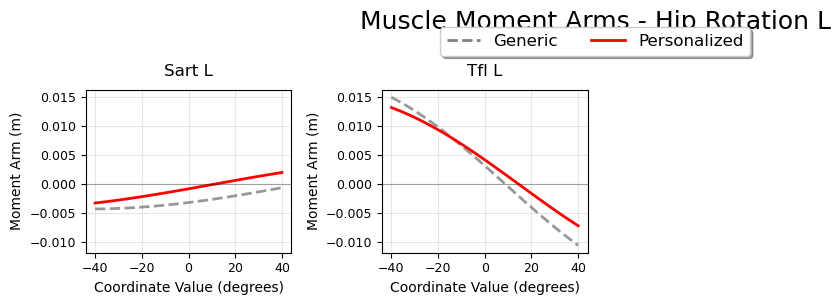

Global y-axis range for knee_angle_l: [-0.0176, 0.0455] meters
Coordinate 'knee_angle_l' detected as rotational
X-axis range: 0.00 to 120.00 °


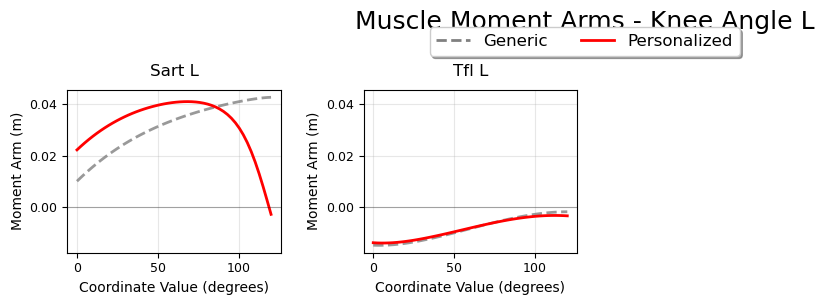

In [6]:
specific_muscles_2 = ['tfl_l', 'sart_l']
specific_coordinates_2 = ['hip_flexion_l', 'hip_adduction_l', 'hip_rotation_l', 'knee_angle_l']
analyzer.plot_specific_muscles(specific_coordinates_2, specific_muscles_2, False, True) 

Global y-axis range for knee_angle_r: [0.0149, 0.0293] meters
Coordinate 'knee_angle_r' detected as rotational
X-axis range: 0.00 to 120.00 °


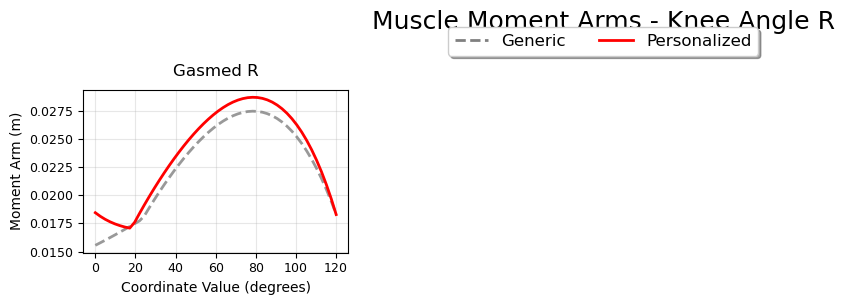

Global y-axis range for knee_angle_l: [0.0147, 0.0338] meters
Coordinate 'knee_angle_l' detected as rotational
X-axis range: 0.00 to 120.00 °


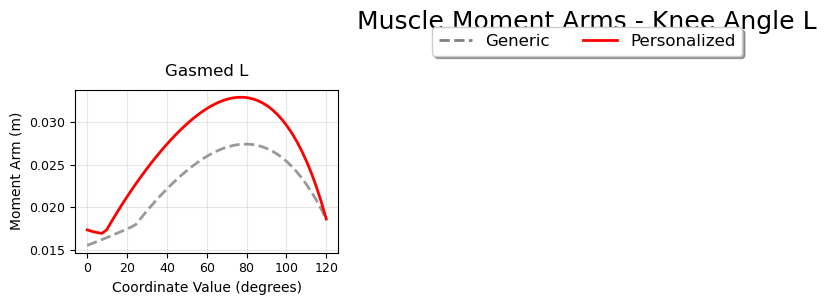

In [7]:
analyzer.plot_specific_muscles(['knee_angle_r'], ['gasmed_r'], False, True)
analyzer.plot_specific_muscles(['knee_angle_l'], ['gasmed_l'], False, True)